<a href="https://colab.research.google.com/github/lee1409/bezier_curve_text_spotting/blob/develop/demo/vis_bezier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%shell
git clone https://github.com/lee1409/bezier_curve_text_spotting.git
cd bezier_curve_text_spotting/
git checkout develop

Branch 'develop' set up to track remote branch 'develop' from 'origin'.


Cloning into 'bezier_curve_text_spotting'...
Switched to a new branch 'develop'


In [2]:
%cd bezier_curve_text_spotting/

/content/bezier_curve_text_spotting


In [3]:
!pip install ninja yacs cython matplotlib tqdm opencv-python torch torchvision

     |████████████████████████████████| 102kB 5.4MB/s 


In [4]:
%%shell
export INSTALL_DIR='/content'
cd $INSTALL_DIR
git clone https://github.com/cocodataset/cocoapi.git
cd cocoapi/PythonAPI
python setup.py build_ext install

# install cityscapesScripts
cd $INSTALL_DIR
git clone https://github.com/mcordts/cityscapesScripts.git
cd cityscapesScripts/
python setup.py build_ext install

# install apex
cd $INSTALL_DIR
git clone https://github.com/NVIDIA/apex.git
pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex

# install PyTorch Detection
cd $INSTALL_DIR
cd bezier_curve_text_spotting/

# the following will install the lib with
# symbolic links, so that you can modify
# the files if you want and won't need to
# re-build it
python setup.py build develop

unset INSTALL_DIR

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 2.54 MiB/s, done.
Resolving deltas: 100% (576/576), done.
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/us

In [5]:
%%shell
pip install gdown
gdown https://drive.google.com/uc?id=1JiIhZXYE5VvT7f7BmaBbtDJThOkR36bo

Downloading...
From: https://drive.google.com/uc?id=1JiIhZXYE5VvT7f7BmaBbtDJThOkR36bo
To: /content/bezier_curve_text_spotting/model_tt_att.pth
144MB [00:00, 188MB/s]


In [6]:
%%shell
gdown https://drive.google.com/uc?id=1Y0fkBy0uy6uFKdlv6IVTZPvERqAoK_j2
mkdir -p datasets/totaltext
unzip total_text_test.zip -d datasets/totaltext

Downloading...
From: https://drive.google.com/uc?id=1Y0fkBy0uy6uFKdlv6IVTZPvERqAoK_j2
To: /content/bezier_curve_text_spotting/total_text_test.zip
106MB [00:00, 187MB/s] 
Archive:  total_text_test.zip
   creating: datasets/totaltext/annotations/
  inflating: datasets/totaltext/annotations/total_test.json  
   creating: datasets/totaltext/test_images/
  inflating: datasets/totaltext/test_images/0000000.jpg  
  inflating: datasets/totaltext/test_images/0000001.jpg  
  inflating: datasets/totaltext/test_images/0000002.jpg  
  inflating: datasets/totaltext/test_images/0000003.jpg  
  inflating: datasets/totaltext/test_images/0000004.jpg  
  inflating: datasets/totaltext/test_images/0000005.jpg  
  inflating: datasets/totaltext/test_images/0000006.jpg  
  inflating: datasets/totaltext/test_images/0000007.jpg  
  inflating: datasets/totaltext/test_images/0000008.jpg  
  inflating: datasets/totaltext/test_images/0000009.jpg  
  inflating: datasets/totaltext/test_images/0000010.jpg  
  inflatin

In [0]:
import cv2
import torch
import numpy as np
import argparse 
from google.colab.patches import cv2_imshow

np.random.seed(2)
torch.manual_seed(3)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.data import make_data_loader
from demo.predictor import COCODemo
from tqdm import tqdm
%matplotlib inline

In [0]:
def main():
    # load config from file and command-line arguments
    cfg.merge_from_file("configs/word_bezier.yaml")
    cfg.freeze()

    # prepare object that handles inference plus adds predictions on top of image
    coco_demo = COCODemo(
        cfg,
        confidence_threshold=0.3,
        show_mask_heatmaps=False,
        masks_per_dim=2,
        min_image_size=800,
    )

    data_loaders = make_data_loader(cfg, is_train=False, is_distributed=False)
    for data_loader in data_loaders:
        for i, batch in tqdm(enumerate(data_loader)):
            images = batch[0].tensors.permute(0, 2, 3, 1)
            gt = batch[1][0]
            assert images.size(0) == 1

            image = images[0] + torch.tensor(cfg.INPUT.PIXEL_MEAN)
            img = np.ascontiguousarray(np.uint8(image.numpy()))

            composite = coco_demo.run_on_opencv_image(img)

            if composite.shape[-1] != 28:
                cv2_imshow(composite)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


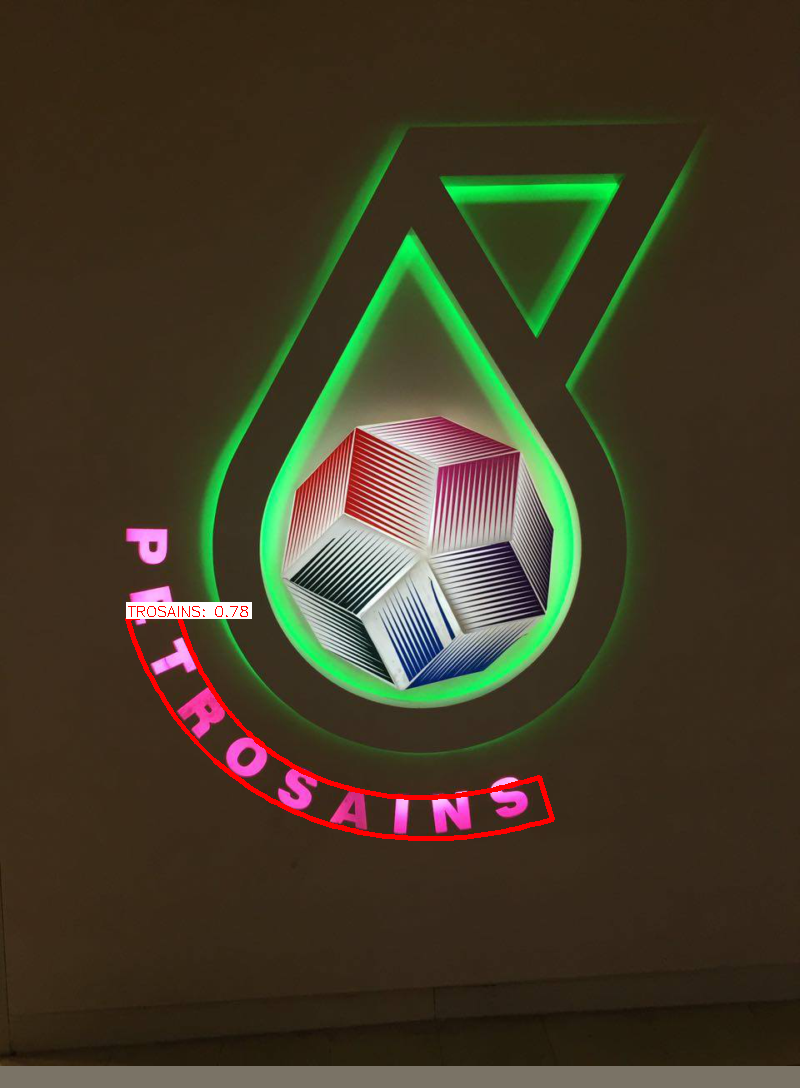

1it [00:00,  1.19it/s]

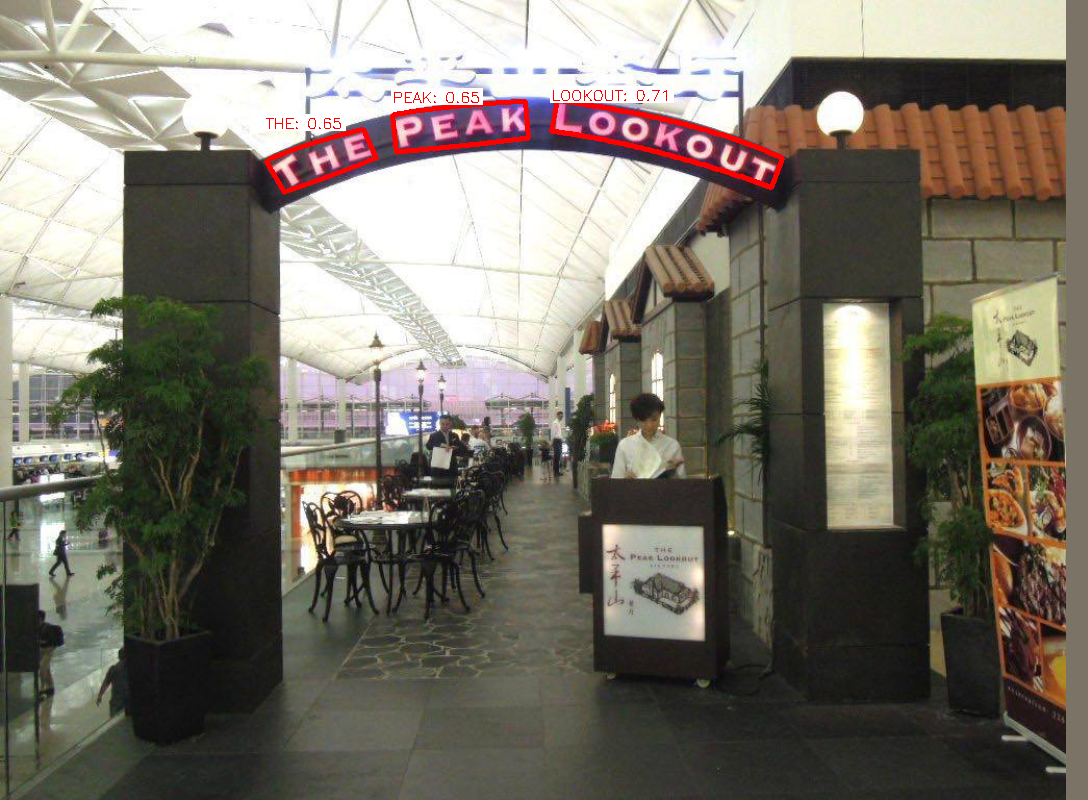

2it [00:01,  1.29it/s]

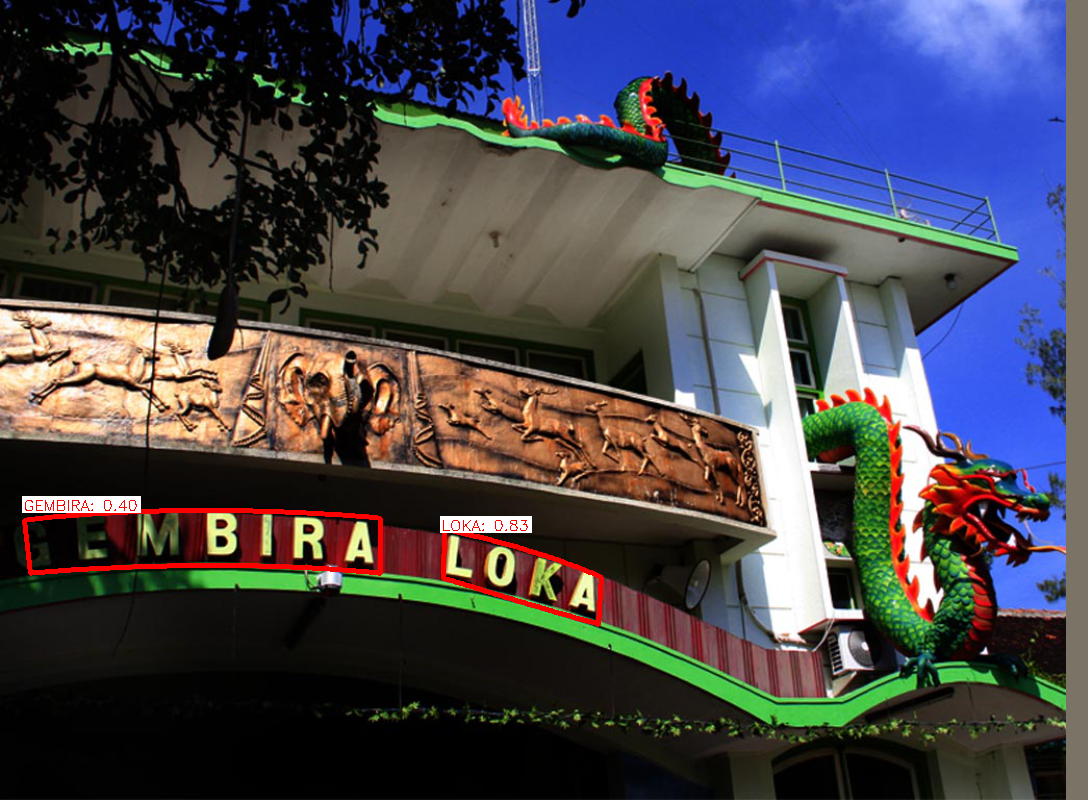

3it [00:02,  1.41it/s]

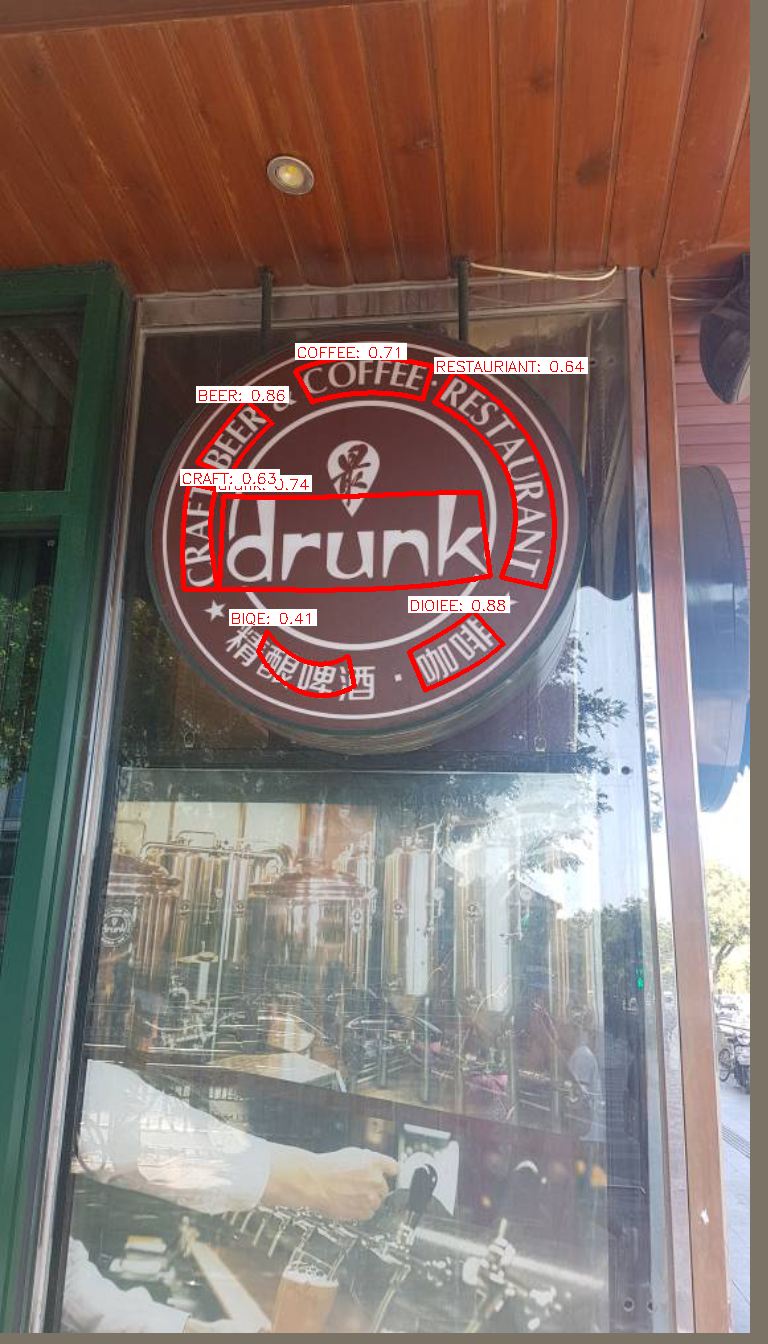

4it [00:02,  1.41it/s]

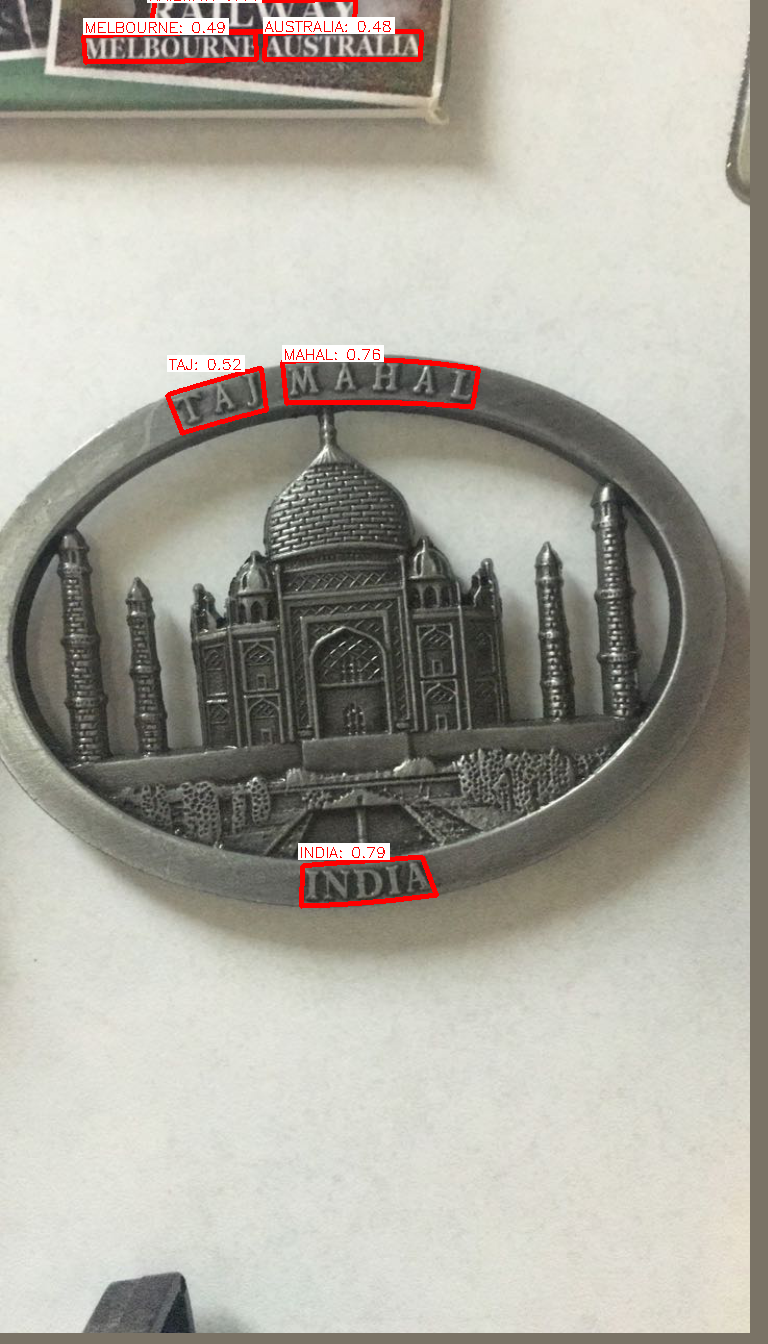

5it [00:03,  1.46it/s]

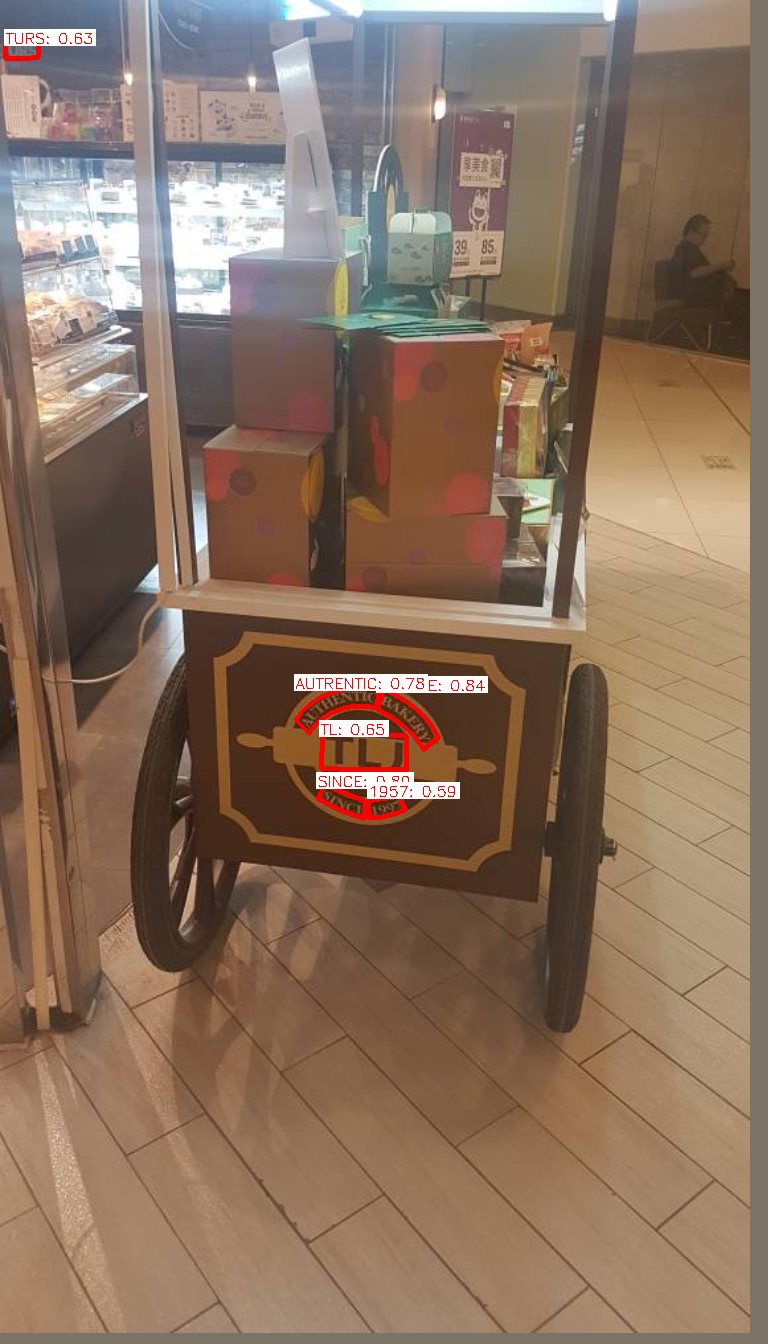

6it [00:04,  1.48it/s]

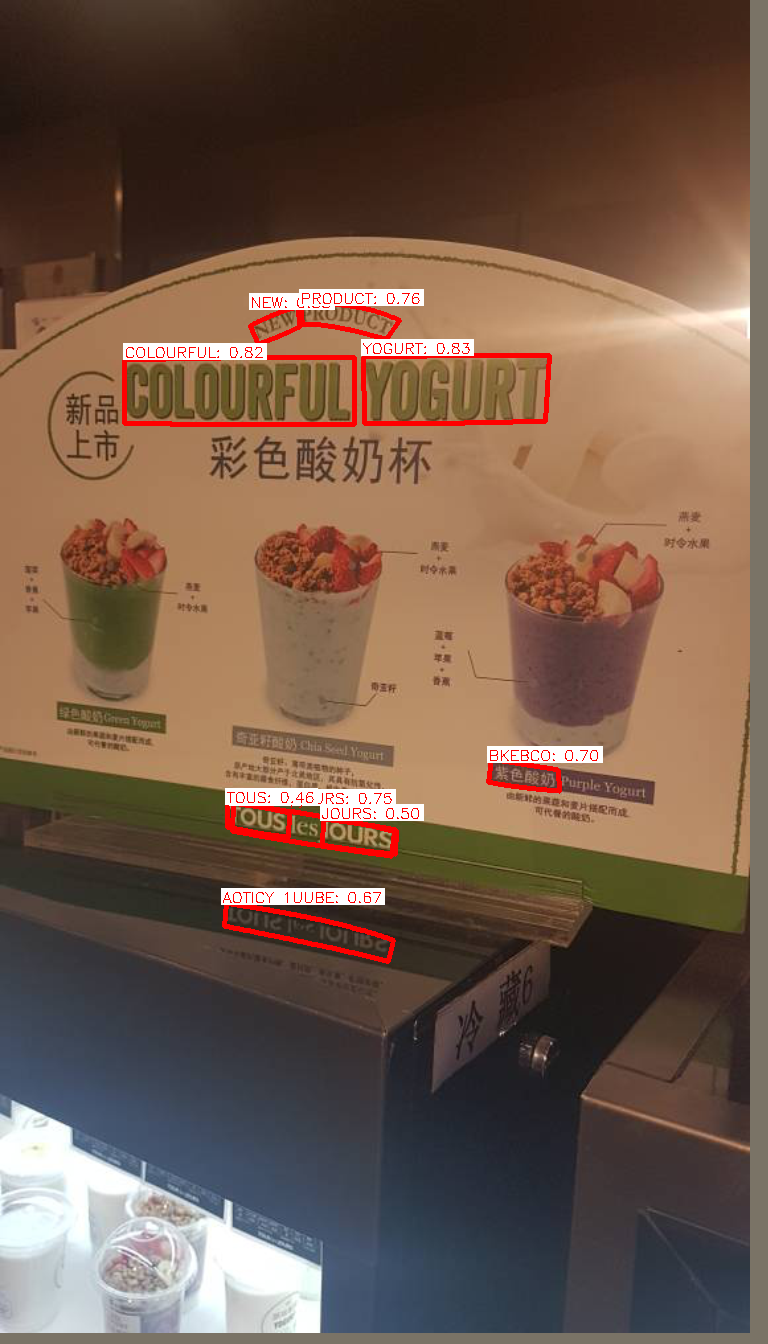

7it [00:04,  1.58it/s]

In [0]:
main()